# Hands on: Visualización y Clustering
## Minería de Datos 2020

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Cada CSV contiene una lista de reproducción de canciones de spotify:
* Dinner: canciones para cenar o para poner en un restaurant
* Sleep: canciones que promueven el sueño
* Party: canciones ideales para el baile
* Workout: canciones para hacer ejercicio

Cada canción tiene un hash único para identificarla en spotify (id), un nombre y el artista correspondiente. El resto de las features (características) las puede ver directamente de la [página de desarrolladores de spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)


**PREGUNTA**: Escriba aquí una tabla markdown con una explicación corta de cada feature.


**1.2**- Cargue cada playlist en un DataFrame pandas. Agregue una columna indicando al **playlist** que pertenece. Concatene todas las playlist en un solo dataframe. Verifique que su dataset tenga sentido.

**RECUERDE:**
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Verifique que los índices del nuevo DataFrame estén correctos
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido

In [11]:
# ponga aquí su código
import pandas as pd
df1=pd.read_csv('party_track.csv')
df1['Playlist'] = 'Party'
df2=pd.read_csv('dinner_track.csv')
df2['Playlist'] = 'Dinner'
df3=pd.read_csv('sleep_track.csv')
df3['Playlist'] = 'Sleep'
df4=pd.read_csv('workout_track.csv')
df4['Playlist'] = 'Workout'
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df_not_na = df.dropna()

df_not_na.describe()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1476.000000,1476.000000,1.476000e+03,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.00000,1476.000000,1476.000000
mean,0.388070,0.559495,2.806775e+05,0.561160,0.270084,5.143631,0.191476,-10.538822,0.580623,0.083123,116.78857,3.894986,0.400453
std,0.379214,0.187704,3.310461e+05,0.291435,0.388601,3.570648,0.164806,7.903582,0.493624,0.083082,27.89534,0.474947,0.256455
min,0.000023,0.058500,5.433300e+04,0.001540,0.000000,0.000000,0.022700,-41.808000,0.000000,0.022900,52.79900,1.000000,0.000010
25%,0.029700,0.452000,1.961372e+05,0.330500,0.000000,2.000000,0.096775,-13.885000,0.000000,0.036975,95.08400,4.000000,0.192750
50%,0.236000,0.594500,2.252025e+05,0.611000,0.001220,5.000000,0.121000,-7.627500,1.000000,0.048900,117.98500,4.000000,0.368000
75%,0.794250,0.694000,2.726370e+05,0.801250,0.743000,8.000000,0.232000,-5.016750,1.000000,0.082575,131.47000,4.000000,0.588000
max,0.996000,0.967000,4.500037e+06,1.000000,0.996000,11.000000,0.979000,-0.750000,1.000000,0.520000,213.97300,5.000000,0.974000


**PREGUNTA**: Si aprendieramos automáticamente la variable **playlist**, ¿qué problema de la vida real estariamos resolviendo? ¿Cree usted que será posible deducir esta variable a partir de los otros datos numéricos (hipótesis)?

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame (sólo valores numéricos) y presentela gráficamente como un mapa de calor. Haga una selección de 5 características que le parezcan interesantes y presente su matriz de covarianza en el mismo formato.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
feat_select = ['acousticness','duration_ms','energy','instrumentalness','loudness']
def plot_corr_matrix (data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()

    
    
    

    

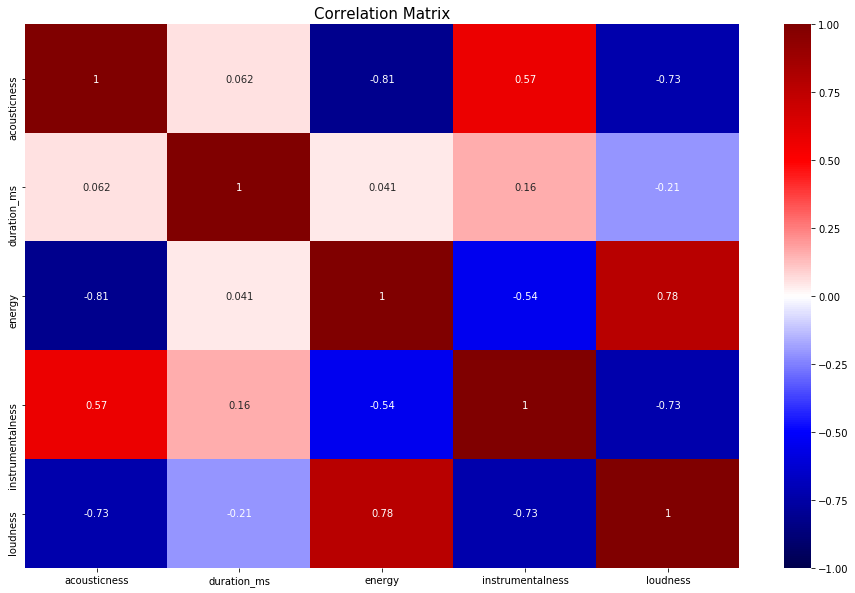

In [26]:
plot_corr_matrix(df_not_na,features=feat_select)

**PREGUNTA**: Al hacer la selección usted aprendió algo de los datos (patrón, tendencia, repetición, etc.). Explique brevemente lo que usted conjetura o cree respecto a los datos.

 <b> Respuesta </b>: Al gráficar la matriz de correlacion entre las variables {'acousticness','duration_ms','energy','instrumentalness','loudness'} podemos observar que la duración no aporta mucho. En cuanto a lo ruidosa que es una canción , se puede concluir que mientras más ruidosa mayor energía, menor instrumentalización y menor acuústica de la canción. 

**2.2**- Utilice seaborn para gráficar las proyecciones 2D de los datos en estas 5 dimensiones. Agregue la variable playlist como descriptor de color de los puntos.

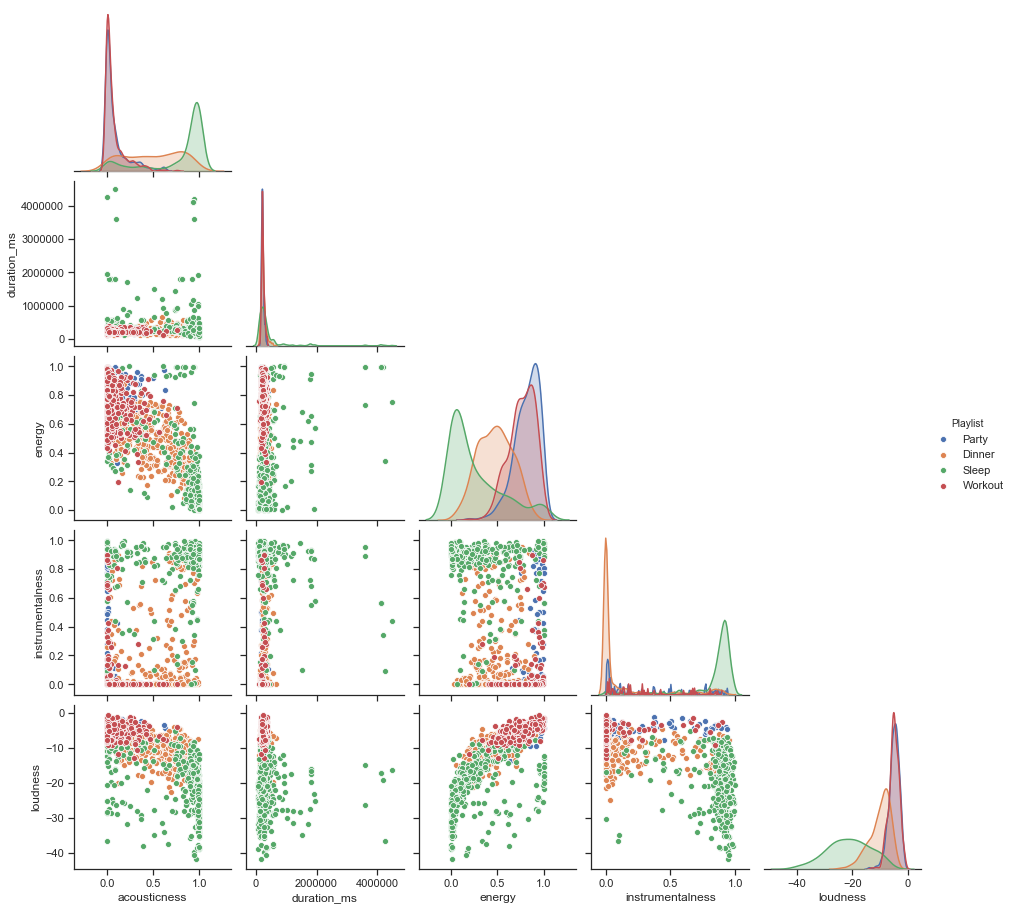

In [34]:
sns.set(style="ticks",color_codes = True)
feat_select.append('Playlist')
sns.pairplot(df_not_na[feat_select], hue ='Playlist',corner=True)


**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados?

**2.3**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable playlist como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones.

In [ ]:
# ponga aquí su código

**PREGUNTA**: ¿Cuál representación de 5 dimensiones tiene mayor potencial para clustering según usted? Fundamente y utilice esta representación desde ahora en adelante. 

**2.4**- Visualice la representación seleccionada con t-SNE de 2 dimensiones. Pruebe con al menos 3 valores de perplejidad.

In [3]:
# ponga aquí su código

**PREGUNTA**: ¿Considera usted que t-SNE ayuda en este caso? Indique cual es el efecto del parámetro perplejidad con 

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering. Si el algoritmo lo requiere, fije la cantidad de clusters a 4 (cantidad real de playlist). 

In [ ]:
# ponga aquí su código

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.

In [1]:
# ponga aquí su código

**PREGUNTA**: fundamente su elección y explique si funcionó o no.

**3.3** Seleccione un representante adecuado para cada cluster, y haga una tabla con los nombres de las canciones y sus respectivos artistas.

In [3]:
# ponga aquí su código

**PREGUNTA FINAL**: cual es su veredicto (tesis) en contraste con lo escrito en el punto 1.2. 